<a href="https://colab.research.google.com/github/fatimazain118/ML/blob/main/Lab4/DecisionTree_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [460]:
import numpy as np 
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import logging,sys


In [461]:
from google.colab import drive  
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [462]:
df = pd.read_csv("/content/gdrive/MyDrive/binary.csv.zip") 

In [463]:
df.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [464]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


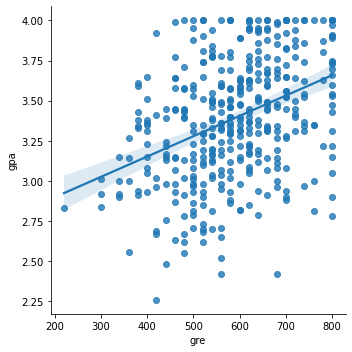

In [465]:
import seaborn as sns
sns.lmplot(x = "gre", y = "gpa", data = df)

In [466]:
df["rank"].unique()

array([3, 1, 4, 2])

In [467]:
df["rank"].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: rank, dtype: float64

In [468]:
df.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


Diagonal is all 1's because each feature is 100% correlated with itself.

In [469]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression   #Classification

In [470]:
df.corr()   

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


# Decision Tree

In [471]:
#Splitting independent data and targeted data as test and train
X_train, X_test, Y_train, Y_test= train_test_split(df[["gpa","gre","rank"]],
                                                   df[["admit"]],test_size=0.10,
                                                   random_state= 20)

In [472]:
X_train.shape

(360, 3)

In [473]:
X_test.shape

(40, 3)

In [474]:
#clf_entropy=LogisticRegression()  
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = 'gini', max_depth=4, min_samples_leaf=4)   #in criterion we can also use gini or entropy, also parameters can be use like max_depth=8, min_samples_leaf=4

In [475]:
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [476]:
#clf_entropy.get_depth()  #full depth of tree k liye pehle data ko fit kro

In [477]:
#predicting test data values for clf_entropy model
predicted_entropy = clf_entropy.predict(X_test)

In [478]:
#Confusion Matrix
from  sklearn.metrics import confusion_matrix 
cM = confusion_matrix(Y_test,predicted_entropy)
print(cM)
#generic matrix
tn, fp, fn, tp = cM.ravel()    #tn= not admitted #0=admitted, 1= not admitted
recall = tp/(tp+fn)
precision=tp/(tp+fp)
print("Recall = Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Precision=",tp/(tp+fp))
f1score= 2 *(recall*precision)/(precision+recall)
print("f1 score=", f1score)


[[32  3]
 [ 4  1]]
Recall = Sensitivity =  0.2
Specificity = 0.9142857142857143
Accuracy= 0.825
Precision= 0.25
f1 score= 0.22222222222222224


[Text(170.3892857142857, 195.696, 'X[2] <= 2.5\ngini = 0.448\nsamples = 360\nvalue = [238, 122]'),
 Text(95.65714285714286, 152.208, 'X[0] <= 3.41\ngini = 0.495\nsamples = 186\nvalue = [102, 84]'),
 Text(47.82857142857143, 108.72, 'X[1] <= 750.0\ngini = 0.44\nsamples = 95\nvalue = [64, 31]'),
 Text(23.914285714285715, 65.232, 'X[0] <= 3.21\ngini = 0.41\nsamples = 87\nvalue = [62, 25]'),
 Text(11.957142857142857, 21.744, 'gini = 0.456\nsamples = 54\nvalue = [35, 19]'),
 Text(35.871428571428574, 21.744, 'gini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(71.74285714285715, 65.232, 'X[1] <= 790.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(59.785714285714285, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(83.7, 21.744, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(143.4857142857143, 108.72, 'X[2] <= 1.5\ngini = 0.486\nsamples = 91\nvalue = [38, 53]'),
 Text(119.57142857142857, 65.232, 'X[0] <= 3.675\ngini = 0.35\nsamples = 31\nvalue = [7, 24]'),
 Text(107.61428571

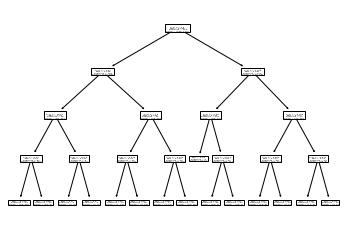

In [479]:
from sklearn.tree import plot_tree
plot_tree(clf_entropy)

In [480]:
#For area under the curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(Y_test,predicted_entropy)
aucP = auc(fpr, tpr)
aucP

0.557142857142857

In [481]:
#clf_entropy.coef_

In [482]:
#clf_entropy.intercept_